In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from matplotlib import style
import seaborn as sns
plt.style.use("ggplot")

In [3]:
data = pd.read_csv("student_mat.csv", sep=";")

In [4]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## Data analysis

In [5]:
df_analysis = data[["sex", "age", "traveltime","absences","freetime","studytime", "schoolsup", "health","failures","activities", "internet", "paid", "Fjob", "Mjob", "G1", "G2", "G3"]]

df_analysis.head()


,sex,age,traveltime,absences,freetime,studytime,schoolsup,health,failures,activities,internet,paid,Fjob,Mjob,G1,G2,G3
0,F,18,2,6,3,2,yes,3,0,no,no,no,teacher,at_home,5,6,6
1,F,17,1,4,3,2,no,3,0,no,yes,no,other,at_home,5,5,6
2,F,15,1,10,3,2,yes,3,3,no,yes,yes,other,at_home,7,8,10
3,F,15,1,2,2,3,no,5,0,yes,yes,yes,services,health,15,14,15
4,F,16,1,4,3,2,no,5,0,no,no,yes,other,other,6,10,10


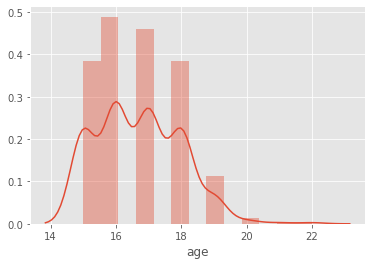

In [6]:
sns.distplot(df_analysis["age"], kde=True)

#### Maximum age students in the class is between 15 to 16

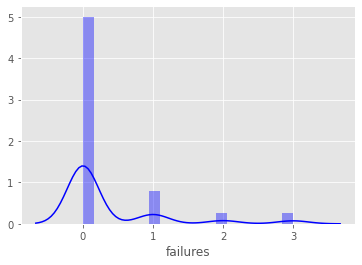

In [7]:
sns.distplot(df_analysis["failures"], kde=True, color="b")

#### Number of failures in the class is less 

## Graph showing absences related to age

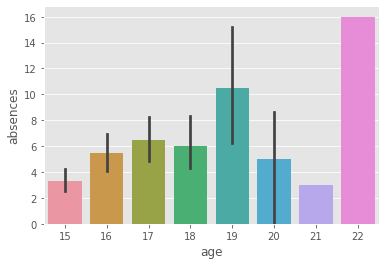

In [8]:
# health - current health status (numeric: from 1 - very bad to 5 - very good)
sns.barplot(x="age", y="absences", data=df_analysis)

#### The above graph shows that absences is maximum in the age 22 

##  Graphs showing absences affecting marks 

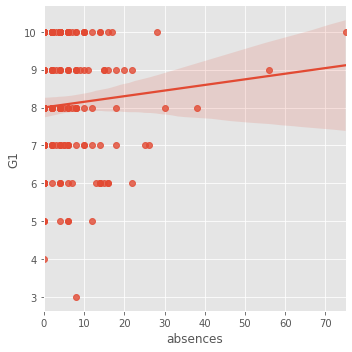

In [9]:
# remove outliers
df_analysis = df_analysis.loc[df_analysis['G1']< df_analysis['G1'].quantile(0.5)]
# plotting grpah
graph = sns.lmplot(x="absences", y="G1", data=df_analysis)

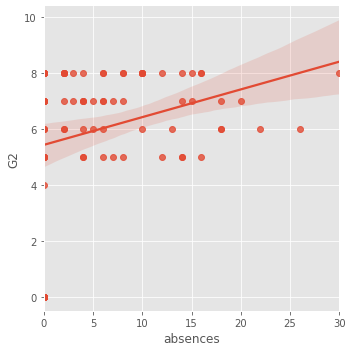

In [10]:
# remove outliers
df_analysis = df_analysis.loc[df_analysis['G2']< df_analysis['G2'].quantile(0.5)]
# plotting graph
graph = sns.lmplot(x="absences", y="G2", data=df_analysis)

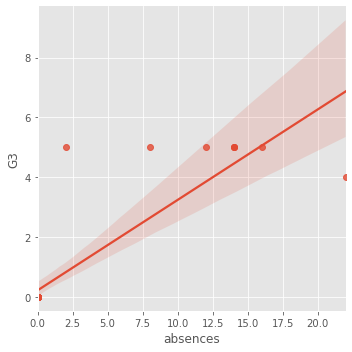

In [11]:

# remove outliers
df_analysis = df_analysis.loc[df_analysis['G3']< df_analysis['G3'].quantile(0.5)]
# plotting graph
graph = sns.lmplot(x="absences", y="G3", data=df_analysis)

#### We can clearly say that absence in class is somewhat related to lower marks obtained by students

## Final Marks prediction

In [12]:
df = data[["G1", "G2", "G3", "absences","studytime", "freetime", "health"]]

In [13]:
df.head()

,G1,G2,G3,absences,studytime,freetime,health
0,5,6,6,6,2,3,3
1,5,5,6,4,2,3,3
2,7,8,10,10,2,3,3
3,15,14,15,2,3,2,5
4,6,10,10,4,2,3,5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   G1         395 non-null    int64
 1   G2         395 non-null    int64
 2   G3         395 non-null    int64
 3   absences   395 non-null    int64
 4   studytime  395 non-null    int64
 5   freetime   395 non-null    int64
 6   health     395 non-null    int64
dtypes: int64(7)
memory usage: 21.7 KB


### predict G3 marks 

In [15]:
predict = "G3"

In [16]:
# y = mx + c

# x will have g1 and g2 value only 
X = np.array(df.drop([predict], 1)) 
print(X)

[[ 5  6  6  2  3  3]
 [ 5  5  4  2  3  3]
 [ 7  8 10  2  3  3]
 ...
 [10  8  3  1  5  3]
 [11 12  0  1  4  5]
 [ 8  9  5  1  2  5]]


In [17]:
# y will have g3 value which we will predict
y = np.array(df[[predict]])
print(y)

[[ 6]
 [ 6]
 [10]
 [15]
 [10]
 [15]
 [11]
 [ 6]
 [19]
 [15]
 [ 9]
 [12]
 [14]
 [11]
 [16]
 [14]
 [14]
 [10]
 [ 5]
 [10]
 [15]
 [15]
 [16]
 [12]
 [ 8]
 [ 8]
 [11]
 [15]
 [11]
 [11]
 [12]
 [17]
 [16]
 [12]
 [15]
 [ 6]
 [18]
 [15]
 [11]
 [13]
 [11]
 [12]
 [18]
 [11]
 [ 9]
 [ 6]
 [11]
 [20]
 [14]
 [ 7]
 [13]
 [13]
 [10]
 [11]
 [13]
 [10]
 [15]
 [15]
 [ 9]
 [16]
 [11]
 [11]
 [ 9]
 [ 9]
 [10]
 [15]
 [12]
 [ 6]
 [ 8]
 [16]
 [15]
 [10]
 [ 5]
 [14]
 [11]
 [10]
 [10]
 [11]
 [10]
 [ 5]
 [12]
 [11]
 [ 6]
 [15]
 [10]
 [ 8]
 [ 6]
 [14]
 [10]
 [ 7]
 [ 8]
 [18]
 [ 6]
 [10]
 [14]
 [10]
 [15]
 [10]
 [14]
 [ 8]
 [ 5]
 [17]
 [14]
 [ 6]
 [18]
 [11]
 [ 8]
 [18]
 [13]
 [16]
 [19]
 [10]
 [13]
 [19]
 [ 9]
 [16]
 [14]
 [13]
 [ 8]
 [13]
 [15]
 [15]
 [13]
 [13]
 [ 8]
 [12]
 [11]
 [ 9]
 [ 0]
 [18]
 [ 0]
 [ 0]
 [12]
 [11]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [12]
 [15]
 [ 0]
 [ 9]
 [11]
 [13]
 [ 0]
 [11]
 [ 0]
 [11]
 [ 0]
 [10]
 [ 0]
 [14]
 [10]
 [ 0]
 [12]
 [ 8]
 [13]
 [10]
 [15]
 [12]
 [ 0]
 [ 7]
 [ 0]
 [10]
 [ 7]
 [12]
 [10

In [18]:
# spliting the data into test and train in the ratio of 90:10
# spliting into four arrays



#### spliting data syntax here should be moved after tranning module

In [19]:

# x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1, random_state=0)


#### Only best tranied model will get saved 

In [20]:
best = 0
for i in range(100):
    
    # spliting data syntax should be moved out of the loop after tranning and storing trained module.
    # after test_size in for loop should be added not to select random data while splitting. syntax : random_state=0
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

    linear = linear_model.LinearRegression()
    

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    # accuracy 
    print("accuracy:", acc)
    
    
    # saving the model: 

    #studentmodel is the name of the model
    #wb mode
    
    if acc>best:
        best=acc
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f) 

print("best accuracy:",best)

LinearRegression()

accuracy: 0.82599414574445


LinearRegression()

accuracy: 0.9030038138132794


LinearRegression()

accuracy: 0.8832921448852619


LinearRegression()

accuracy: 0.7788521856449546


LinearRegression()

accuracy: 0.777159696239457


LinearRegression()

accuracy: 0.8142063298542959


LinearRegression()

accuracy: 0.8481574202075717


LinearRegression()

accuracy: 0.8034160940296158


LinearRegression()

accuracy: 0.7977614821336968


LinearRegression()

accuracy: 0.8651578997372378


LinearRegression()

accuracy: 0.7167966218657245


LinearRegression()

accuracy: 0.8452746819914823


LinearRegression()

accuracy: 0.8268846857924668


LinearRegression()

accuracy: 0.8332842653152797


LinearRegression()

accuracy: 0.8941645061047114


LinearRegression()

accuracy: 0.7456258625242189


LinearRegression()

accuracy: 0.801007320619676


LinearRegression()

accuracy: 0.910070301765649


LinearRegression()

accuracy: 0.7601035990520808


LinearRegression()

accuracy: 0.7311852332589814


LinearRegression()

accuracy: 0.9028288101200908


LinearRegression()

accuracy: 0.8200226545721064


LinearRegression()

accuracy: 0.7980918992618593


LinearRegression()

accuracy: 0.9039217430770943


LinearRegression()

accuracy: 0.9045653706273648


LinearRegression()

accuracy: 0.7327237854342334


LinearRegression()

accuracy: 0.6361254342425371


LinearRegression()

accuracy: 0.8119068447227421


LinearRegression()

accuracy: 0.8356439647896363


LinearRegression()

accuracy: 0.7629686691525244


LinearRegression()

accuracy: 0.7839247907110057


LinearRegression()

accuracy: 0.8748866397019418


LinearRegression()

accuracy: 0.7655635406606721


LinearRegression()

accuracy: 0.7690834772100719


LinearRegression()

accuracy: 0.7834390966895892


LinearRegression()

accuracy: 0.7355054922076866


LinearRegression()

accuracy: 0.7622361031537328


LinearRegression()

accuracy: 0.7118622793496687


LinearRegression()

accuracy: 0.8236082923719711


LinearRegression()

accuracy: 0.8527423682520696


LinearRegression()

accuracy: 0.8118377179171797


LinearRegression()

accuracy: 0.7026015896424002


LinearRegression()

accuracy: 0.763944659125832


LinearRegression()

accuracy: 0.8580293474980476


LinearRegression()

accuracy: 0.8843282991921315


LinearRegression()

accuracy: 0.891940478702483


LinearRegression()

accuracy: 0.9545212584966669


LinearRegression()

accuracy: 0.8487217699038226


LinearRegression()

accuracy: 0.8866471845606221


LinearRegression()

accuracy: 0.900475715805086


LinearRegression()

accuracy: 0.8428707680221793


LinearRegression()

accuracy: 0.8970846127681


LinearRegression()

accuracy: 0.8064430397997419


LinearRegression()

accuracy: 0.874889340037436


LinearRegression()

accuracy: 0.6242707260018938


LinearRegression()

accuracy: 0.761432179158874


LinearRegression()

accuracy: 0.8526334819972339


LinearRegression()

accuracy: 0.7286207240236529


LinearRegression()

accuracy: 0.8352808436015043


LinearRegression()

accuracy: 0.9053846601243583


LinearRegression()

accuracy: 0.8786761317781209


LinearRegression()

accuracy: 0.7550451232968171


LinearRegression()

accuracy: 0.8362148609010022


LinearRegression()

accuracy: 0.8875190612160176


LinearRegression()

accuracy: 0.8231325769367226


LinearRegression()

accuracy: 0.7307069023181834


LinearRegression()

accuracy: 0.724527405116886


LinearRegression()

accuracy: 0.7245211479975942


LinearRegression()

accuracy: 0.8596797173885709


LinearRegression()

accuracy: 0.8492696497934973


LinearRegression()

accuracy: 0.7459519012342822


LinearRegression()

accuracy: 0.8370959989568406


LinearRegression()

accuracy: 0.7653505961607321


LinearRegression()

accuracy: 0.7337807970416721


LinearRegression()

accuracy: 0.8631763335092004


LinearRegression()

accuracy: 0.8247058927559051


LinearRegression()

accuracy: 0.8548103237059668


LinearRegression()

accuracy: 0.8324709595376525


LinearRegression()

accuracy: 0.8906649286419258


LinearRegression()

accuracy: 0.9073991188110307


LinearRegression()

accuracy: 0.7324667561300504


LinearRegression()

accuracy: 0.7173023208672205


LinearRegression()

accuracy: 0.7126188928721923


LinearRegression()

accuracy: 0.8634717189632033


LinearRegression()

accuracy: 0.7933681829161838


LinearRegression()

accuracy: 0.873605473672818


LinearRegression()

accuracy: 0.8230995369846311


LinearRegression()

accuracy: 0.8915276780367096


LinearRegression()

accuracy: 0.9148408634632607


LinearRegression()

accuracy: 0.9180943378295425


LinearRegression()

accuracy: 0.8676825968008229


LinearRegression()

accuracy: 0.8593974307045639


LinearRegression()

accuracy: 0.869710669486216


LinearRegression()

accuracy: 0.8305354008714783


LinearRegression()

accuracy: 0.8351949333765688


LinearRegression()

accuracy: 0.7793847554441442


LinearRegression()

accuracy: 0.8578266987454968


LinearRegression()

accuracy: 0.7520646862619639


LinearRegression()

accuracy: 0.8662311398649971


LinearRegression()

accuracy: 0.8613337944294273
best accuracy: 0.9545212584966669


#### After traning the model for 100 times, accuracy usually remains between 89 to 94 %

#### model is trained and saved. So we commented this section of training the model.

In [21]:
# linear = linear_model.LinearRegression()

In [22]:
# linear.fit(x_train, y_train)
# acc = linear.score(x_test, y_test)
# accuracy 
#print(acc)

In [23]:
# saving the model: 

# studentmodel is the name of the model
# wb mode
# with open("studentmodel.pickle", "wb") as f:
    #pickle.dump(linear, f) 

In [24]:
# loading the pickle file with model so that we do not need to train our model every time
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in) 

In [25]:
print('Coefficient(m): \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Coefficient(m): 
 [[ 0.16104653  0.99858973  0.03701014 -0.1294768   0.06280475  0.10259153]]
Intercept: 
 [-2.56401879]


In [26]:
y_pred = linear.predict(x_train)

In [27]:
print(len(y_pred))

355


In [28]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train,y_pred)

1.2049014153308124

In [29]:
for x in range(len(y_pred)):
    # checking for prerdict output
    print(x_train[x],y_train[x], y_pred[x])
    

[10 11  4  2  4  4] [9] [10.58160559]
[13 11  8  3  4  3] [11] [10.9807174]
[14 14  2  1  3  5] [14] [14.3168042]
[13 14  0  1  3  3] [14] [13.87655434]
[12 11 11  2  3  5] [11] [11.20255639]
[8 7 6 2 3 3] [9] [6.17377761]
[10 10  4  2  3  4] [10] [9.52021111]
[14 13  0  4  3  3] [14] [12.65058074]
[ 7 10  6  2  3  2] [10] [8.90590875]
[ 9  7 20  2  2  5] [8] [6.99534436]
[18 16  0  3  3  4] [16] [16.52260437]
[11 11  3  3  3  3] [11] [10.41076891]
[ 9  8 10  2  4  3] [8] [7.54425917]
[8 9 8 1 3 5] [10] [8.5796372]
[ 9  7 18  2  4  5] [6] [7.04693359]
[6 9 4 1 2 5] [8] [8.04669884]
[13 14  4  3  3  1] [14] [13.56045824]
[15 12  0  2  5  5] [12] [12.40278369]
[18 18 24  1  2  2] [18] [19.39899294]
[14 12 10  2  2  5] [11] [12.42342429]
[8 6 2 2 3 5] [5] [5.23233038]
[15 13  9  2  4  2] [15] [13.36388534]
[16 16  2  2  3  2] [16] [16.19882534]
[13 12  0  1  3  5] [12] [12.08455793]
[13 13  4  4  3  3] [12] [12.63757476]
[15 14  2  2  5  1] [14] [14.06361733]
[15 15  2  2  4  5] [16] [15.

[16 15  0  2  3  1] [15] [15.02362381]
[7 7 2 2 4 3] [7] [5.92749528]
[3 5 8 2 3 5] [5] [3.65056883]
[11  8  2  2  4  1] [8] [7.36508808]
[14 13  8  1  3  2] [13] [13.23250072]
[11 11  2  2  4  5] [11] [10.77122337]
[11 10  0  1  2  4] [10] [9.59988914]
[18 19 10  1  5  3] [19] [20.17044652]
[12 12 13  2  3  3] [13] [12.06998334]
[10  9 10  2  4  5] [10] [8.90907848]
[16 14  6  4  5  5] [15] [14.52411691]
[16 17  0  2  4  5] [17] [17.49397412]
[11  0  0  3  3  5] [0] [-0.47956549]
[ 8  8 10  4  3  3] [8] [7.06145429]
[12 11  0  2  2  3] [12] [10.52745707]
[8 7 0 2 3 3] [0] [5.95171678]
[10 10  6  4  3  5] [11] [9.43786931]
[14 12  4  1  4  5] [11] [12.45644976]
[11 11  0  1  2  4] [12] [10.59847887]
[14 15  3  1  3  5] [16] [15.35240407]
[10 10  0  2  3  2] [0] [9.16698751]
[7 6 0 1 2 1] [0] [4.65356952]
[10  9 28  3  4  5] [9] [9.44578416]
[ 9 12  3  3  3  3] [11] [11.08726558]
[ 7  6 18  1  3  3] [6] [5.5877398]
[11  9 12  2  2  3] [9] [8.81335273]
[13 13  0  3  2  5] [13] [12.761389

### The easiest way to compare the target and prediction is to plot them of scatter plot

Text(0.5, 0, 'Targets (y_train)')

Text(0, 0.5, 'Predictions (y_pred)')

(0.0, 22.0)

(0.0, 22.0)

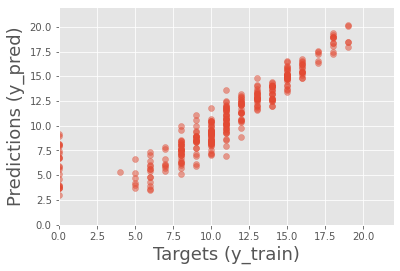

In [30]:
plt.scatter(y_train, y_pred, alpha=0.5)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_pred)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(0,22)
plt.ylim(0,22)
plt.show()

#### From the above graph we can clearly say that our model predicts almost accurate results. 
#### Howerver there are few wrong predictions. More tranning the model might help. 

## Testing the model:

In [31]:
y_pred_test = linear.predict(x_test)

In [32]:
print(len(y_pred_test))

40


In [33]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_pred_test)

1.0455007498913376

In [34]:
for x in range(len(y_pred_test)):
    # checking for prerdict output
    print(y_test[x], y_pred_test[x])

[9] [9.38773583]
[18] [16.17628981]
[13] [12.30096101]
[11] [12.13556473]
[8] [7.02567806]
[9] [9.51732999]
[15] [14.70153075]
[6] [4.69204829]
[10] [8.22809957]
[14] [15.34696366]
[12] [11.7455916]
[15] [15.31839241]
[10] [8.42876162]
[11] [10.4976823]
[13] [11.69531488]
[13] [12.69003281]
[12] [12.17893241]
[14] [13.97092882]
[11] [13.09049589]
[12] [13.10693448]
[13] [12.94811759]
[20] [19.42999604]
[5] [4.34286775]
[10] [11.11154548]
[0] [5.12674037]
[13] [11.97600196]
[11] [10.56604032]
[12] [11.84248211]
[11] [10.48190807]
[15] [14.15609237]
[17] [15.02374117]
[11] [10.78243889]
[9] [7.16980805]
[0] [5.60660575]
[10] [10.56604032]
[11] [10.92236688]
[0] [-1.09686633]
[10] [11.01929615]
[9] [8.74525532]
[7] [7.75062224]


### plotting out test data vs predicted test data

Text(0.5, 0, 'Targets (y_test)')

Text(0, 0.5, 'Predictions (y_pred_test)')

(0.0, 22.0)

(0.0, 22.0)

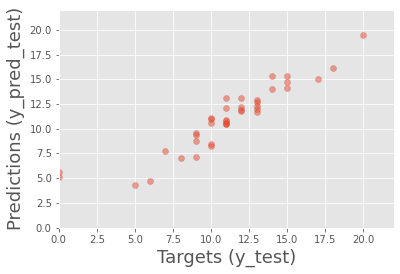

In [37]:
plt.scatter(y_test, y_pred_test, alpha=0.5)
# Let's also name the axes
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_pred_test)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(0,22)
plt.ylim(0,22)
plt.show()

#### Our prediction data is close enough to the final test data. Hence we can host this model !